In [5]:
# Import the library we need, which is Pandas and Matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#matplotlib inline

# Import statsmodel
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import adfuller

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [6]:
# Set some parameters to get good visuals - style to ggplot and size to 15,10
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (15, 10)

In [9]:
# Read the csv file of Monthwise Quantity and Price csv file we have.
df = pd.read_csv('/home/amartya/usm/summer17/deepLearning/tensorflow/MonthWiseMarketArrivals_Clean.csv')

In [10]:
# Changing the date column to a Time Interval columnn
df.date = pd.DatetimeIndex(df.date)

In [12]:
# Change the index to the date column
df.index = pd.PeriodIndex(df.date, freq='M')

In [14]:
# Sort the data frame by date
df = df.sort_values(by = "date")

In [16]:
df.head()


,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
1996-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON,1996-01-01
1996-02,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON,1996-02-01
1996-03,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON,1996-03-01
1996-04,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON,1996-04-01
1996-05,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON,1996-05-01


In [17]:
dfBang = df.loc[df.city == "BANGALORE"].copy()

In [18]:
dfBang.head()

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
date,,,,,,,,,,
2004-01,BANGALORE,January,2004,227832,916,1066,991,KNT,BANGALORE,2004-01-01
2004-02,BANGALORE,February,2004,225133,741,870,793,KNT,BANGALORE,2004-02-01
2004-03,BANGALORE,March,2004,221952,527,586,556,KNT,BANGALORE,2004-03-01
2004-04,BANGALORE,April,2004,185150,419,518,465,KNT,BANGALORE,2004-04-01
2004-05,BANGALORE,May,2004,137390,400,516,455,KNT,BANGALORE,2004-05-01


In [19]:
dfBang = dfBang.drop(["market", "month", "year", "state", "city", "priceMin", "priceMax"], axis = 1)

In [20]:
dfBang.head()

,quantity,priceMod,date
date,,,
2004-01,227832,991,2004-01-01
2004-02,225133,793,2004-02-01
2004-03,221952,556,2004-03-01
2004-04,185150,465,2004-04-01
2004-05,137390,455,2004-05-01


In [28]:
x = dfBang.priceMod

In [29]:
plt.plot(x)

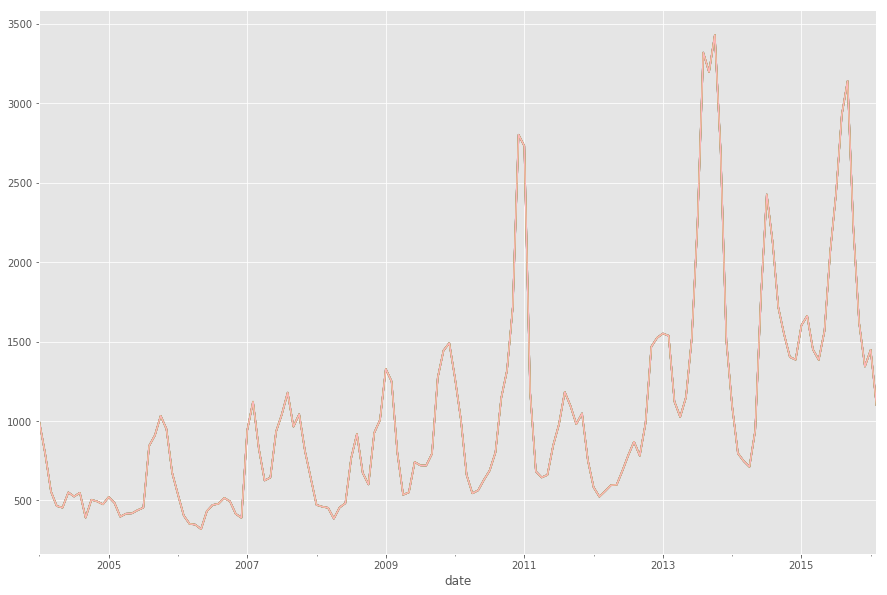

In [30]:
plt.show()

In [37]:
y = dfBang.quantity

In [38]:
plt.plot(y)

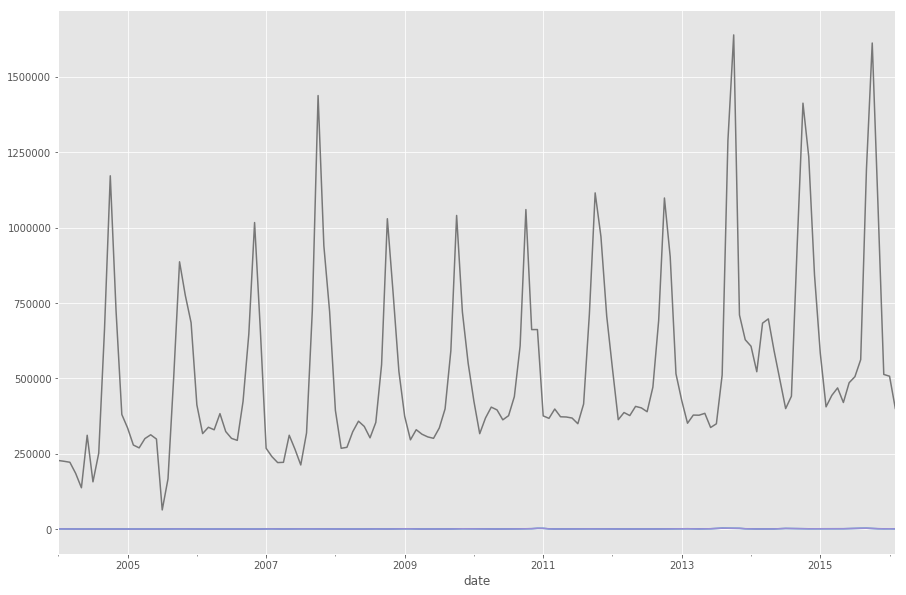

In [39]:
plt.show()

In [43]:
histogram = dfBang.priceMod.plot(kind = "hist", bins = 30)


In [17]:
from pandas import Series
from matplotlib import pyplot
from pandas import Series
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
import numpy

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [14]:
series = Series.from_csv('daily-total-female-births-in-cal.csv', header=1)

In [15]:
print(series.head())

1959-01-02
1959-01-03    30
1959-01-04    31
1959-01-05    44
1959-01-06    29
1959-01-07    45
Name: 32, dtype: int64


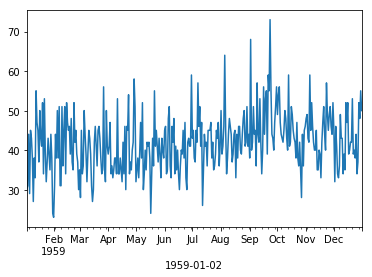

In [16]:
series.plot()
pyplot.show()

In [18]:
# create a difference transform of the dataset
def difference(dataset):
	diff = list()
	for i in range(1, len(dataset)):
		value = dataset[i] - dataset[i - 1]
		diff.append(value)
	return numpy.array(diff)

In [19]:
# Make a prediction give regression coefficients and lag obs
def predict(coef, history):
	yhat = coef[0]
	for i in range(1, len(coef)):
		yhat += coef[i] * history[-i]
	return yhat

In [20]:
# split dataset
X = difference(series.values)
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:]

In [21]:
# train autoregression
model = AR(train)
model_fit = model.fit(maxlag=6, disp=False)
window = model_fit.k_ar
coef = model_fit.params

In [22]:
# walk forward over time steps in test
history = [train[i] for i in range(len(train))]
predictions = list()
for t in range(len(test)):
	yhat = predict(coef, history)
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

Test MSE: 52.803


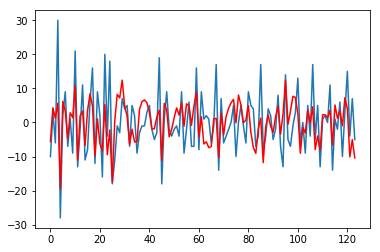

In [23]:
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

In [25]:
# save model to file
model_fit.save('ar_model.pkl')

In [26]:
# save the differenced dataset
numpy.save('ar_data.npy', X)

In [27]:
# save the last ob
numpy.save('ar_obs.npy', [series.values[-1]])

In [28]:
# load the AR model from file
from statsmodels.tsa.ar_model import ARResults
import numpy
loaded = ARResults.load('ar_model.pkl')
print(loaded.params)
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
print(last_ob)

[ 0.12668899 -0.77325705 -0.63909093 -0.56305297 -0.4648888  -0.33234421
 -0.19081377]
[50]


In [42]:
from statsmodels.tsa.ar_model import ARResults
import numpy
# load model
model = ARResults.load('ar_model.pkl')
data = numpy.load('ar_data.npy')
last_ob = numpy.load('ar_obs.npy')
len(data)
numpy.save('man_model.npy', coef)


window_size = 6

lag = X[-window_size:]
numpy.save('man_data.npy', lag)
# save the last ob
numpy.save('man_obs.npy', [series.values[-1]])

In [52]:
def predict(coef, history):
	yhat = coef[0]
	for i in range(1, len(coef)):
		yhat += coef[i] * history[-i]
	return yhat
 
# load model
coef = numpy.load('man_model.npy')
lag = numpy.load('man_data.npy')
last_ob = numpy.load('man_obs.npy')
# make prediction
prediction = predict(coef, lag)
print('Prediction_1: %f' % prediction)
# transform prediction
yhat = prediction + last_ob[0]
print('Prediction: %f' % yhat)
coef

Prediction_1: -4.290677
Prediction: 45.709323


array([ 0.12668899, -0.77325705, -0.63909093, -0.56305297, -0.4648888 ,
       -0.33234421, -0.19081377])

In [45]:
coef

array([ 0.12668899, -0.77325705, -0.63909093, -0.56305297, -0.4648888 ,
       -0.33234421, -0.19081377])

In [46]:
lag

array([-10,   3,  15,  -4,   7,  -5])

In [47]:
last_ob

array([50])

In [48]:
X

array([  1,  13, -15,  16,  -2,  -5, -11,  11,  -5,  22,  -8,  -2,  -8,
        13,  -7,  -2,  11, -18,  19, -14,  -7,   5,   6,  -4,  -4,   9,
        -6, -14,  -1,   8,  13,  -6,  12, -12,  13, -20,   0,  20, -15,
         9,   6, -17,  18,  -5,  -2,   1,  -7,   9, -11,  -2,  17, -10,
         3,  -6,  -2,  -7,   5,  -7,  17, -11,   2,  14,  -6,  -5,  -7,
         7,   6,  -2,  -4,  -8,  -4,   3,  12,   4,  -5,  -5,   9,   1,
        -3,  -5,  -4,   1,  21, -20,  -4,  18,  -9,  -2,   2,   6, -13,
         2,  -3,   2,   3,   0,  -4,  19, -19,   0,   4,  -3,  -3,  10,
        -8,  12, -16,  16,  -1,   9, -20,   3,  -2,   5,   2,  16,  -7,
       -19,   3,   3,  -5,   6,   8,  -9,  14, -22,   4,   6,  -5,   7,
        -1,   1,  -4, -14,  10,   9,  -7,  19, -14,   4,  -4,  -4,   6,
        -4,  -6,  10,  -3,  -2,   7,   1, -12,   1,  13,   3, -15,  -3,
        13,  -4,   6, -14,   7,  -6,   5,  -6,  -4,   6,   4,  -1,   6,
        -7,   9, -14,  -3,  12,   1,  -2,   0,  18, -16,   2,  -

In [49]:
lag = X[-window_size:]

In [50]:
lag

array([-10,   3,  15,  -4,   7,  -5])